In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import datetime
from dateutil.parser import parse
from tqdm import tqdm
import sys
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
######################################
#    DOWNLOAD DATA
######################################

# https://drive.google.com/drive/folders/1Xt9EcMG64I_2y_fxu4d5Zr-qo2VlwiOP?usp=sharing

In [133]:
data = pd.read_csv('data/data.csv')

In [134]:
details = pd.read_csv('data/movie_detials.csv')

In [111]:
data

,Unnamed: 0,MovieID,UserID,Rating,Rated Date,Released Date,Title,Released Since,show_id
0,0,30,2173336,5,2004-06-22,2003,Something's Gotta Give,538 days,s8056
1,1,30,2473170,5,2004-05-22,2003,Something's Gotta Give,507 days,s8056
2,2,30,900816,3,2005-07-08,2003,Something's Gotta Give,919 days,s8056
3,3,30,1990901,4,2004-05-24,2003,Something's Gotta Give,509 days,s8056
4,4,30,662337,4,2005-07-08,2003,Something's Gotta Give,919 days,s8056
...,...,...,...,...,...,...,...,...,...
14111282,14394810,17725,2526746,4,2005-03-09,1999,Jerry Seinfeld: I'm Telling You for the Last Time,2259 days,s5057
14111283,14394811,17725,77915,1,2005-03-14,1999,Jerry Seinfeld: I'm Telling You for the Last Time,2264 days,s5057
14111284,14394812,17725,2180413,2,2005-09-12,1999,Jerry Seinfeld: I'm Telling You for the Last Time,2446 days,s5057
14111285,14394813,17725,1292639,1,2005-09-30,1999,Jerry Seinfeld: I'm Telling You for the Last Time,2464 days,s5057


In [112]:
details

,Unnamed: 0,show_id,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s8056,Nancy Meyers,"Jack Nicholson, Diane Keaton, Keanu Reeves, Fr...",United States,"August 1, 2019",2003,PG-13,128 min,"Comedies, Romantic Movies","Still sexy at 60, Harry Sanborn wines and dine..."
1,118413,s6642,Rob Cohen,"Sean Connery, Dennis Quaid, David Thewlis, Pet...",United States,"January 1, 2020",1996,PG-13,103 min,"Action & Adventure, Sci-Fi & Fantasy",In ancient times when majestic fire-breathers ...
2,135818,s568,Frank Marshall,"Dylan Walsh, Laura Linney, Ernie Hudson, Tim C...",United States,"July 1, 2021",1995,PG-13,108 min,"Action & Adventure, Thrillers","Eight people, some with ulterior motives, go o..."
3,149416,s601,David Fincher,"Michael Douglas, Sean Penn, Deborah Kara Unger...",United States,"July 1, 2021",1997,R,129 min,Thrillers,An aloof investment banker's life spirals into...
4,187778,s8111,Rob Minkoff,"Michael J. Fox, Geena Davis, Hugh Laurie, Jona...",United States,"January 1, 2020",2002,PG,78 min,"Children & Family Movies, Comedies",Zany misadventures are in store as lovable cit...
...,...,...,...,...,...,...,...,...,...,...,...
585,14365233,s1442,Sohail Khan,"Salman Khan, Arbaaz Khan, Rani Mukerji, Johny ...",India,"January 4, 2021",1999,TV-14,126 min,"Action & Adventure, Comedies, International Mo...",After receiving a heart transplant from a murd...
586,14365322,s7580,Dennie Gordon,"Mary-Kate Olsen, Ashley Olsen, Eugene Levy, An...",United States,"January 1, 2020",2004,PG,91 min,"Children & Family Movies, Comedies",When bickering teenage twins accidentally land...
587,14378240,s8395,"Blake Harris, Chris Bouchard","William Moseley, Poppy Drayton, Loreto Peralta...",United States,"December 1, 2018",2018,PG,85 min,"Children & Family Movies, Dramas","In this take on the classic tale, a captive ci..."
588,14385226,s2197,Mickey Fonseca,"Gil Alexandre, Arlete Bombe, Rashid Abdul, Laq...",Mozambique,"July 29, 2020",2019,TV-MA,102 min,"Dramas, International Movies, Thrillers","Newly released from prison, a man returning to..."


## Plots

#### Basic

- Number of movies per release date
- Number of ratings per movie
- Average ratings per movie

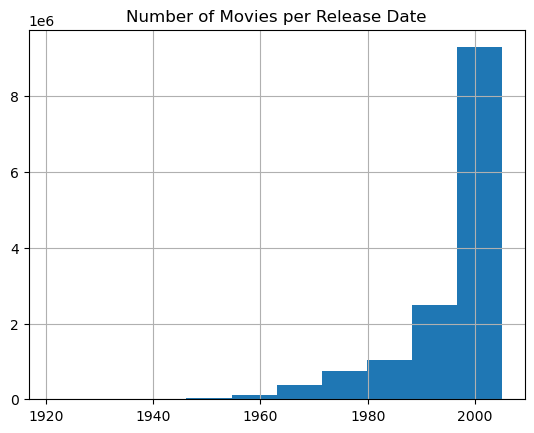

In [113]:
data['Released Date'].hist()
plt.title("Number of Movies per Release Date")
plt.show()

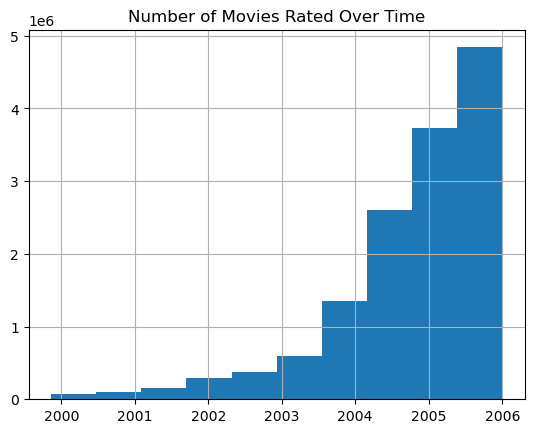

In [114]:
pd.to_datetime(data['Rated Date']).hist()
plt.title("Number of Movies Rated Over Time")
plt.show()

In [122]:
#datee = data['Rated Date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
temp = data
temp['month'] = data['Rated Date'].apply(lambda x: x.split('-')[1])
temp['day_of_month'] = data['Rated Date'].apply(lambda x: x.split('-')[2])
temp['year'] = data['Rated Date'].apply(lambda x: x.split('-')[0])
temp.head()

,Unnamed: 0,MovieID,UserID,Rating,Rated Date,Released Date,Title,Released Since,show_id,month,day__of_month,day_of_month,year
0,0,30,2173336,5,2004-06-22,2003,Something's Gotta Give,538 days,s8056,06,22,22,2004
1,1,30,2473170,5,2004-05-22,2003,Something's Gotta Give,507 days,s8056,05,22,22,2004
2,2,30,900816,3,2005-07-08,2003,Something's Gotta Give,919 days,s8056,07,08,08,2005
3,3,30,1990901,4,2004-05-24,2003,Something's Gotta Give,509 days,s8056,05,24,24,2004
4,4,30,662337,4,2005-07-08,2003,Something's Gotta Give,919 days,s8056,07,08,08,2005


In [118]:
# temp['month'].hist(bins = 20)
# plt.title("Number of Movies Ratings per Month")
# plt.show()

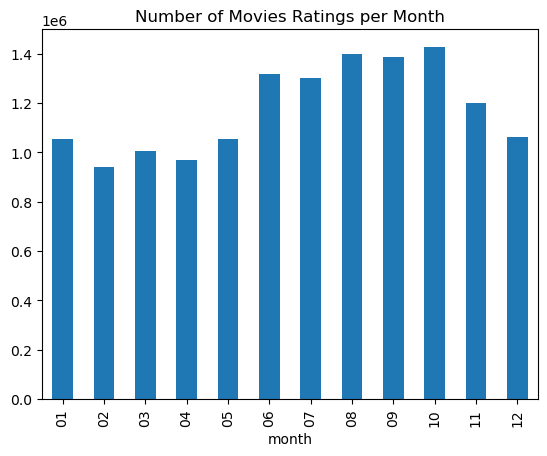

In [119]:
temp.groupby('month')['Rating'].count().plot.bar()
plt.title("Number of Movie Ratings per Month")
plt.show()

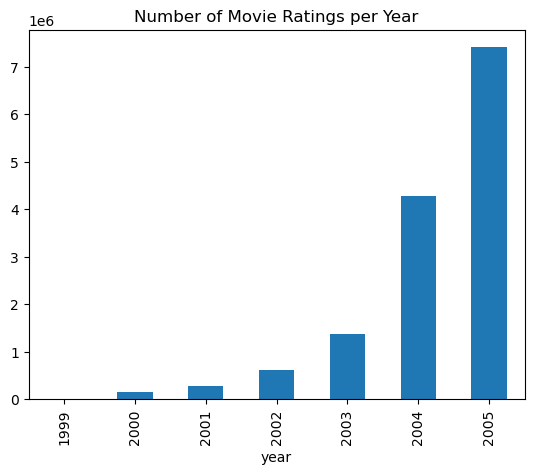

In [124]:
temp.groupby('year')['Rating'].count().plot.bar()
plt.title("Number of Movie Ratings per Year")
plt.show()

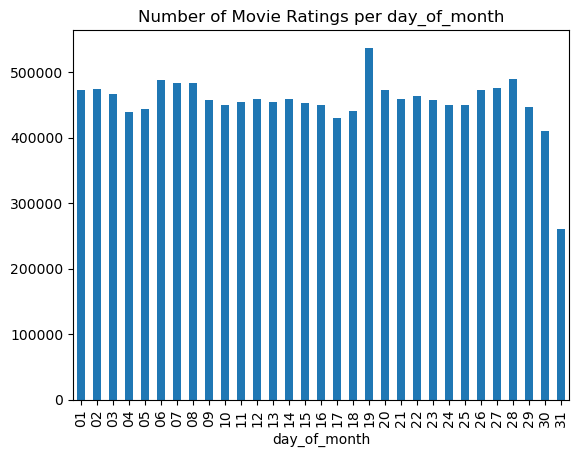

In [125]:
temp.groupby('day_of_month')['Rating'].count().plot.bar()
plt.title("Number of Movie Ratings per day_of_month")
plt.show()

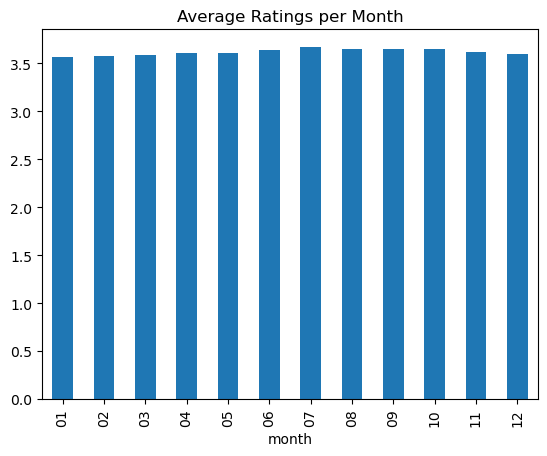

In [120]:
temp.groupby('month')['Rating'].mean().plot.bar()
plt.title("Average Ratings per Month")
plt.show()

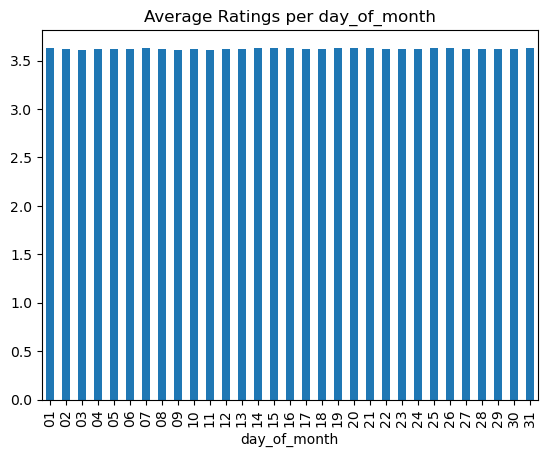

In [126]:
temp.groupby('day_of_month')['Rating'].mean().plot.bar()
plt.title("Average Ratings per day_of_month")
plt.show()

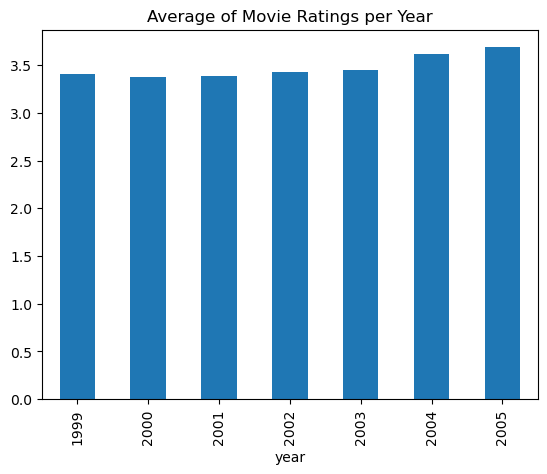

In [128]:
temp.groupby('year')['Rating'].mean().plot.bar()
plt.title("Average of Movie Ratings per Year")
plt.show()

In [140]:
word_to_ix = {}
num_unique_words = 0
for d in details['Title']:
    sent = d.split()
    for word in sent:
        word = word.lower()
        if word not in word_to_ix:
            word_to_ix[word] = 1
            num_unique_words += 1
        else:
            word_to_ix[word] = word_to_ix[word] + 1

In [146]:
d =sorted(word_to_ix.items(), reverse=True, key=lambda kv: kv[1])
#import collections
#sorted_dict = collections.OrderedDict(sorted_x)
d

[('the', 144),
 ('of', 34),
 ('in', 21),
 ('a', 19),
 ('and', 12),
 ('2', 10),
 ('american', 10),
 ('little', 8),
 ('love', 7),
 ('&', 6),
 ('dil', 6),
 ('hai', 6),
 ('day', 6),
 ('house', 6),
 ('to', 6),
 ('time', 6),
 ('night', 6),
 ('on', 5),
 ('rocky', 5),
 ('for', 5),
 ('my', 5),
 ('jones', 5),
 ('me', 5),
 ('girl', 4),
 ('kid', 4),
 ('movie', 4),
 ('men', 4),
 ('spy', 4),
 ('monster', 4),
 ('black', 4),
 ('ii', 4),
 ('last', 4),
 ('party', 4),
 ('an', 4),
 ('one', 4),
 ('tremors', 3),
 ('boy', 3),
 ('jaws', 3),
 ('run', 3),
 ('na', 3),
 ('good', 3),
 ('four', 3),
 ('mystery', 3),
 ('3', 3),
 ('kids', 3),
 ('island', 3),
 ('dreams', 3),
 ('mirror', 3),
 ('ninja', 3),
 ('wild', 3),
 ('west', 3),
 ('what', 3),
 ('do', 3),
 ('sam', 3),
 ('blue', 3),
 ('you', 3),
 ('3:', 3),
 ('austin', 3),
 ('thing', 3),
 ('money', 3),
 ('river', 3),
 ('balto', 3),
 ('new', 3),
 ('stuart', 2),
 ('legend', 2),
 ('flintstones', 2),
 ('vegas', 2),
 ('kill', 2),
 ('bill:', 2),
 ('vol.', 2),
 ('genius', 2

In [138]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 4.9 MB/s eta 0:00:00


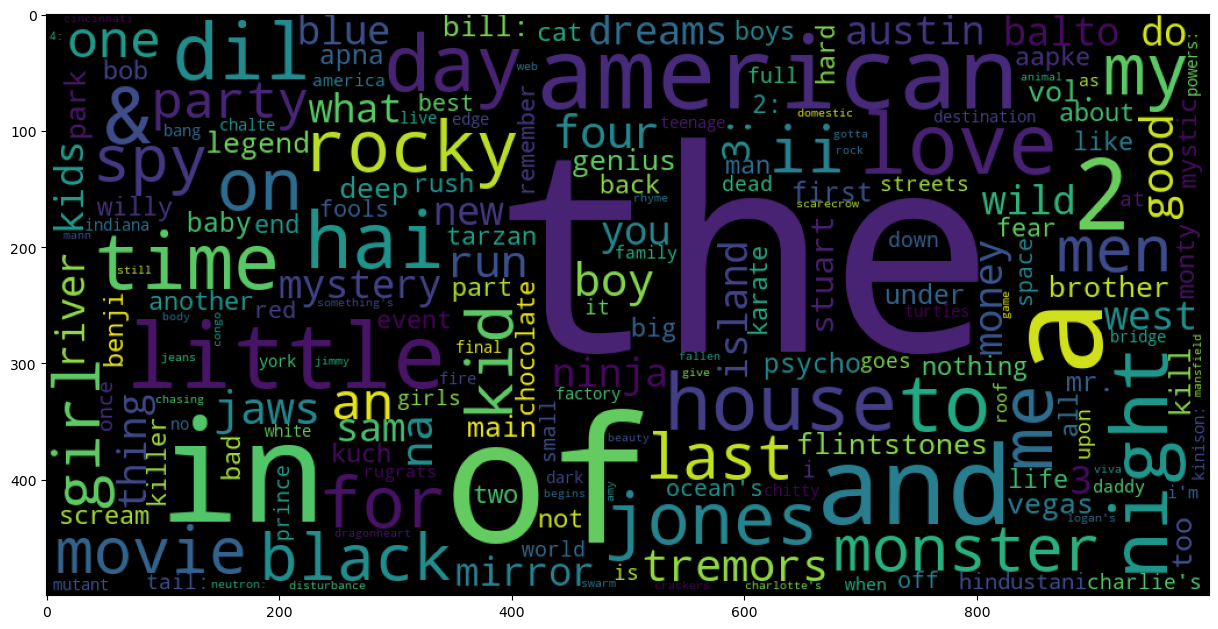

In [142]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_to_ix)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

# TODO : wordcloud for movie description ?
# TODO : EDA for director, cast, country, date_added, release_year, rating, duration, listed_in, description

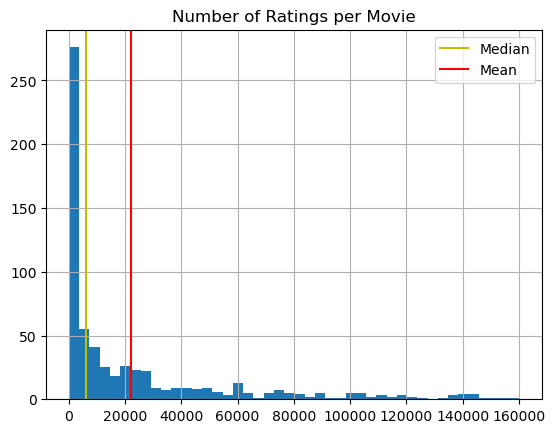

Mean nubmer of rating: 22257.55047318612
Median nubmer of rating: 6015.5
Min number of rating: 27
Max number of rating: 160326


In [6]:
n = 4499

ratings = data.groupby('MovieID').count()['Rating']
ratings.hist(bins=n//100)
plt.axvline(ratings.median(), color='y', label="Median")
plt.axvline(ratings.mean(), color='r', label="Mean")
plt.title("Number of Ratings per Movie")
plt.legend()

plt.show()

print("Mean nubmer of rating:", ratings.mean())
print("Median nubmer of rating:", ratings.median())
print("Min number of rating:", ratings.min())
print("Max number of rating:", ratings.max())

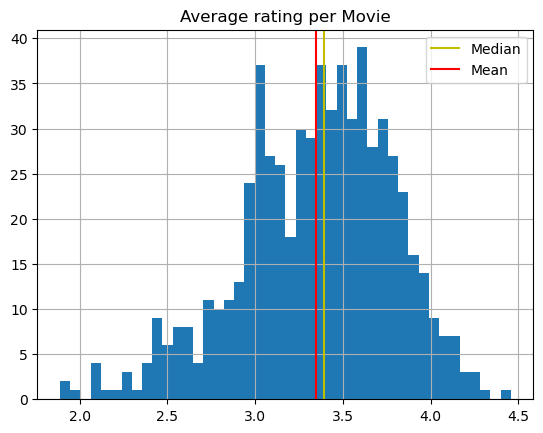

Mean rating: 3.348061439974694
Median rating: 3.393556930750974
Min rating: 1.8877551020408163
Max rating: 4.458004172392996


In [7]:
n = 4499

ratings = data.groupby('MovieID')['Rating'].mean()
ratings.hist(bins=n//100)
plt.axvline(ratings.median(), color='y', label="Median")
plt.axvline(ratings.mean(), color='r', label="Mean")
plt.title("Average rating per Movie")
plt.legend()

plt.show()

print("Mean rating:", ratings.mean())
print("Median rating:", ratings.median())
print("Min rating:", ratings.min())
print("Max rating:", ratings.max())

### Insightful


#### Average and number of ratings per release date 
- Are movies released more recently more likely to recieve better ratings?
- See some trends throughout date.

#### Rating trend of movies.
- How do ratings change across time?
- Plot average rating since release date.


### ToDO
#### Word - Embeddings to Ratings
- Which movie titles contain words that are more significant to viewers?
- Extract words that correlate with better ratings.


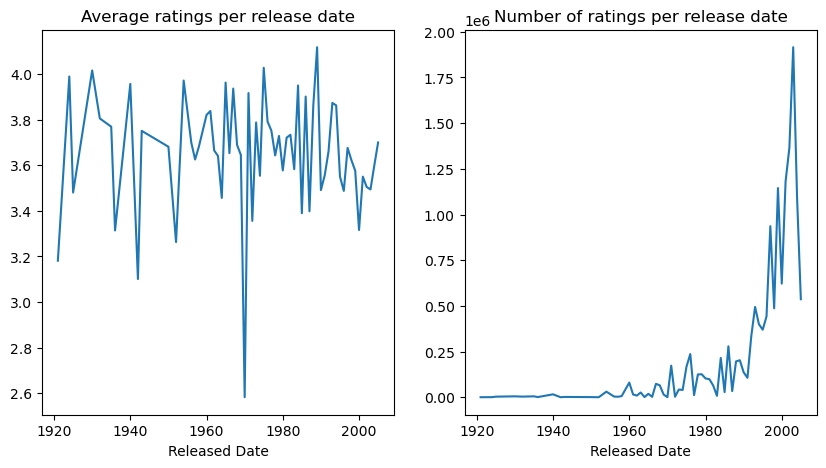

In [8]:
# Average and number of ratings per release date
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data.groupby('Released Date')['Rating'].mean().plot(ax=axs[0])
axs[0].set_title('Average ratings per release date')
data.groupby('Released Date')['Rating'].count().plot(ax=axs[1])
axs[1].set_title('Number of ratings per release date')

plt.show()

# **** NEW ****

In [83]:
data['Released Since'] = pd.to_datetime(data['Rated Date']) - pd.to_datetime(data['Released Date'], format='%Y')

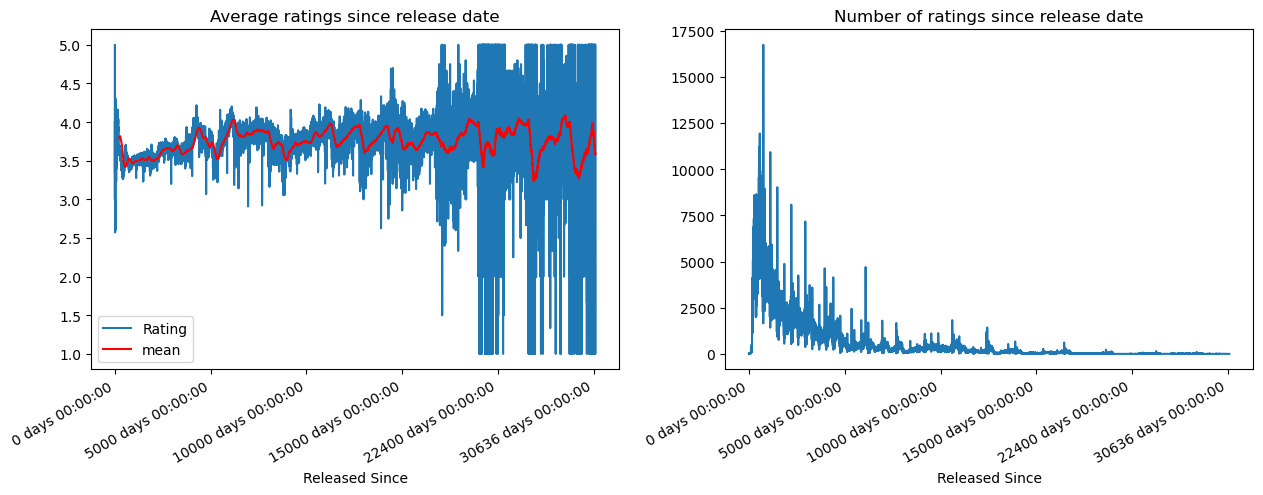

In [89]:
# Average and number of ratings per release date
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

temp = data

#temp['days'] = temp['Released Since'].apply(lambda x: int(''.join(c for c in x if c.isdigit())))

temp.groupby('Released Since')['Rating'].mean().plot(ax=axs[0])
                                            
rating_average = temp.groupby('Released Since')['Rating'].mean().rolling(window=250).mean()
axs[0].plot(rating_average.values, 'r-', label='mean')
axs[0].legend()
axs[0].set_title('Average ratings since release date')

temp.groupby('Released Since')['Rating'].count().plot(ax=axs[1])
axs[1].set_title('Number of ratings since release date')

plt.show()

# * NOTE * 5% (70,5564/14,111,287) of data is used below since Data has 14M rows to reduce runtimes/failures

# Baseline 1

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

#working with half to reduce runtimes/failures
small = data.sample(frac=0.05, replace=False, random_state=20)

X_train, X_test, y_train, y_test = train_test_split(small,
small.Rating, test_size=0.25, random_state=20)

In [178]:
small.shape

(705564, 9)

In [179]:
#baseline 1
global_mean = small.Rating.mean()
y_pred1 = [global_mean for _ in y_test]
mse1 = mse(y_test, y_pred1)
print("Global mean MSE:" + str(mse1))

Global mean MSE:1.105874857064131


# Baseline 2

In [180]:
#baseline2
ratings_per_user = defaultdict(list)
ratings_per_movie = defaultdict(list)
movies_per_user= defaultdict(set)
users_per_movie = defaultdict(set)
for ind, row in small.iterrows():
    ratings_per_user[row.UserID].append(row.Rating)
    ratings_per_movie[row.MovieID].append(row.Rating)
    movies_per_user[row.UserID].add(row.MovieID)
    users_per_movie[row.MovieID].add(row.UserID)

In [181]:
avg_user_rating = {u: (sum(ratings_per_user[u])/len(ratings_per_user[u]))
    if len(ratings_per_user[u]) > 0 else 0 for u in ratings_per_user}

In [182]:
avg_ratings_per_user = {}
for u in ratings_per_user:
    avg_ratings_per_user[u] = np.mean(ratings_per_user[u])

In [183]:
dev_per_user = {u: (sum(ratings_per_user[u])/len(ratings_per_user[u])) - global_mean
    if len(ratings_per_user[u]) > 0 else 0 for u in ratings_per_user}

dev_per_movie = {m: (sum(ratings_per_movie[m])/len(ratings_per_movie[m])) - global_mean 
    if len(ratings_per_movie[m]) > 0 else 0 for m in ratings_per_movie}

def baseline_2(row):
    movie = row.MovieID
    user = row.UserID
    return global_mean + dev_per_user[user] + dev_per_movie[movie] 

y_pred2 = []
for ind, row in X_test.iterrows():
    y_pred2.append(baseline_2(row))

mse2 = mse(y_test, y_pred2)
print("Global mean with user/movie deviations MSE:" + str(mse2))
# Global mean with user/movie deviations MSE:0.446983340249063

Global mean with user/movie deviations MSE:0.5544458538697193


# Baseline 3

In [184]:
mean_per_movie = {m: (sum(ratings_per_movie[m])/len(ratings_per_movie[m])) 
    if len(ratings_per_movie[m]) > 0 else 0 for m in ratings_per_movie}

mean_per_user = {m: (sum(ratings_per_movie[m])/len(ratings_per_movie[m])) 
    if len(ratings_per_movie[m]) > 0 else 0 for m in ratings_per_movie}



def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom == 0:
        return 0
    return numer / denom

def predict_rating(row,thresh):
    ratings = []
    sims = []
    max_sim = 0
    movie = row.MovieID
    user = row.UserID
    rating = row.Rating
    for m in movies_per_user[user]:
        if m == movie: continue
        ratings.append(row.Rating - mean_per_movie[m])
        sim = Jaccard(users_per_movie[movie],users_per_movie[m])
        if sim > max_sim:
            max_sim = sim
            
        sims.append(sim)
    if (max_sim > 0):
        weightedRatings = [(x*y) for x,y in zip(ratings,sims)]
        return mean_per_movie[movie]  + sum(weightedRatings) / sum(sims)
    else:
        return baseline_2(row)#global_mean

#for tresh in np.arange(0, 2, .005):
tresh = 0.000
y_pred3 = [predict_rating(row,tresh) for ind, row in X_test.iterrows()]
mse3 = mse(y_test, y_pred3)
print(f"User similarity (tresh = {tresh}) baseline MSE:" + str(mse3))

User similarity (tresh = 0.0) baseline MSE:0.1409127281409688


# Baseline 4

### **only 1 change from baseline 3 ** Somehow mean_per_movie[movie] - dev_per_movie makes a significant difference not sure how to interpert this

In [185]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom == 0:
        return 0
    return numer / denom

def predict_rating(row,thresh):
    ratings = []
    sims = []
    max_sim = 0
    movie = row.MovieID
    user = row.UserID
    rating = row.Rating
    for m in movies_per_user[user]:
        if m == movie: continue
        ratings.append(row.Rating - mean_per_movie[m])
        sim = Jaccard(users_per_movie[movie],users_per_movie[m])
        if sim > max_sim:
            max_sim = sim
            
        sims.append(sim)

    if (sum(sims) > 0):
        weightedRatings = [(x*y) for x,y in zip(ratings,sims)]
        return mean_per_movie[movie] - dev_per_movie[movie] + sum(weightedRatings) / sum(sims)
    else:
        return baseline_2(row)#global_mean


tresh = 0.000
y_pred3 = [predict_rating(row,tresh) for ind, row in X_test.iterrows()]
mse3 = mse(y_test, y_pred3)
print(f"User similarity (tresh = {tresh}) baseline MSE:" + str(mse3))

User similarity (tresh = 0.0) baseline MSE:0.05960223736677634
